## Indian Companies Registration Data [1857 - 2020]

### Original source
#### https://www.kaggle.com/rowhitswami/all-indian-companies-registration-data-1900-2019

### Import libraries

In [178]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib 
from  matplotlib import pyplot as plt
from  matplotlib import ticker as plticker

import plotly.express as px

### Read Dataset

In [10]:
df = pd.read_csv('registered_companies.csv')

In [17]:
df.head()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
0,F01450,NIKO RESOURCES LIMITED,ACTV,NaN,NaN,NaN,NaN,Gujarat,0.0,0.0,NaN,Agriculture & allied,"4TH FLOOR,LANDMARKRACE COURSE",ROC DELHI,SANJAY@NIKOINDIA.COM,NaN,NaN
1,F01518,WORLDWIDE RESOURCES HOLDINGS LTD,ACTV,NaN,NaN,NaN,16-07-1998,Gujarat,0.0,0.0,NaN,Agriculture & allied,403 3 6 322 MAHAVIR HOUSEBUSHEER BAGH HYDERGUD...,ROC DELHI,NaN,NaN,NaN
2,F01573,ATWOOD OCEANIC PACIFIC LIMITED,ACTV,NaN,NaN,NaN,NaN,Gujarat,0.0,0.0,NaN,Agriculture & allied,"Quadrant 1, Plot Number 18, 2nd FloorSuman Tow...",ROC DELHI,info@nangia.com,NaN,NaN
3,F01802,SOLVAY S A BELGIUM,NAEF,NaN,NaN,NaN,25-06-2001,Gujarat,0.0,0.0,NaN,Agriculture & allied,"Plot No. 3526 & 3527,GIDC Industrial Estate,",ROC DELHI,amit.kumashi@solvay.com,NaN,NaN
4,F01818,TATE AND LYLE INDUSTRIES LTD,ACTV,NaN,NaN,NaN,25-07-2001,Gujarat,0.0,0.0,NaN,Agriculture & allied,24 ATMAJYOTI NAGARELLORA PARK,ROC DELHI,NaN,NaN,NaN


In [18]:
print(f"There are {df.shape[0]} rows")

There are 1992170 rows


#### Seems like there is a lot of missing values. Let's remove rows with missing values since we can not derive missing values anyway.

In [172]:
data = df.dropna()

data.head()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
70,L01110GJ1991PLC015846,AMRAWORLD AGRICO LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,21-06-1991,Gujarat,130000000.0,120300000.0,1110,Agriculture & allied,"24, LAXMI CHAMBERS, NAVJEEVAN PRESS ROAD,OPP. ...",ROC AHMEDABAD,amraworldagrico@gmail.com,31-03-2019,31-03-2019
71,L01110GJ1994PLC021066,TRANS TECHNO FOODS LIMITED,ULQD,Public,Company limited by Shares,Non-govt company,17-01-1994,Gujarat,220000000.0,211200000.0,1110,Agriculture & allied,B-2 SARITA DARSHAN OPP JAIHIND PRESSASHRAM ROAD,ROC AHMEDABAD,anish_shahcs@yahoo.com,31-03-2009,31-03-2006
72,L01110GJ1994PLC021368,GALAXY AGRICO EXPORTS LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,23-02-1994,Gujarat,55000000.0,27316200.0,1110,Agriculture & allied,"236, Jai Kishan Industrial Estate,Behind Murli...",ROC AHMEDABAD,info@galaxyagrico.com,31-03-2019,31-03-2019
73,L01110GJ1996PLC029329,CHEMCRUX ENTERPRISES LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,15-04-1996,Gujarat,60000000.0,49362800.0,1110,Agriculture & allied,"330, TRIVIA Complex,Natubhai Circle, Racecourse",ROC AHMEDABAD,girishshah@chemcrux.com,31-03-2019,31-03-2019
74,L01111GJ2011PLC068414,JIYA ECO-PRODUCTS LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,27-12-2011,Gujarat,320000000.0,300732620.0,1111,Agriculture & allied,"SURVEY NO. 202/2/1, NAVAGAM (G),TALUKA VALLABH...",ROC AHMEDABAD,cfo@jiyaeco.com,31-03-2019,31-03-2019


In [173]:
print(f"There are {data.shape[0]} rows")

There are 1124485 rows


### 1. Find states that have the largest amount of registed companies 
####   First plot is visualized normally, second with using log scale.  

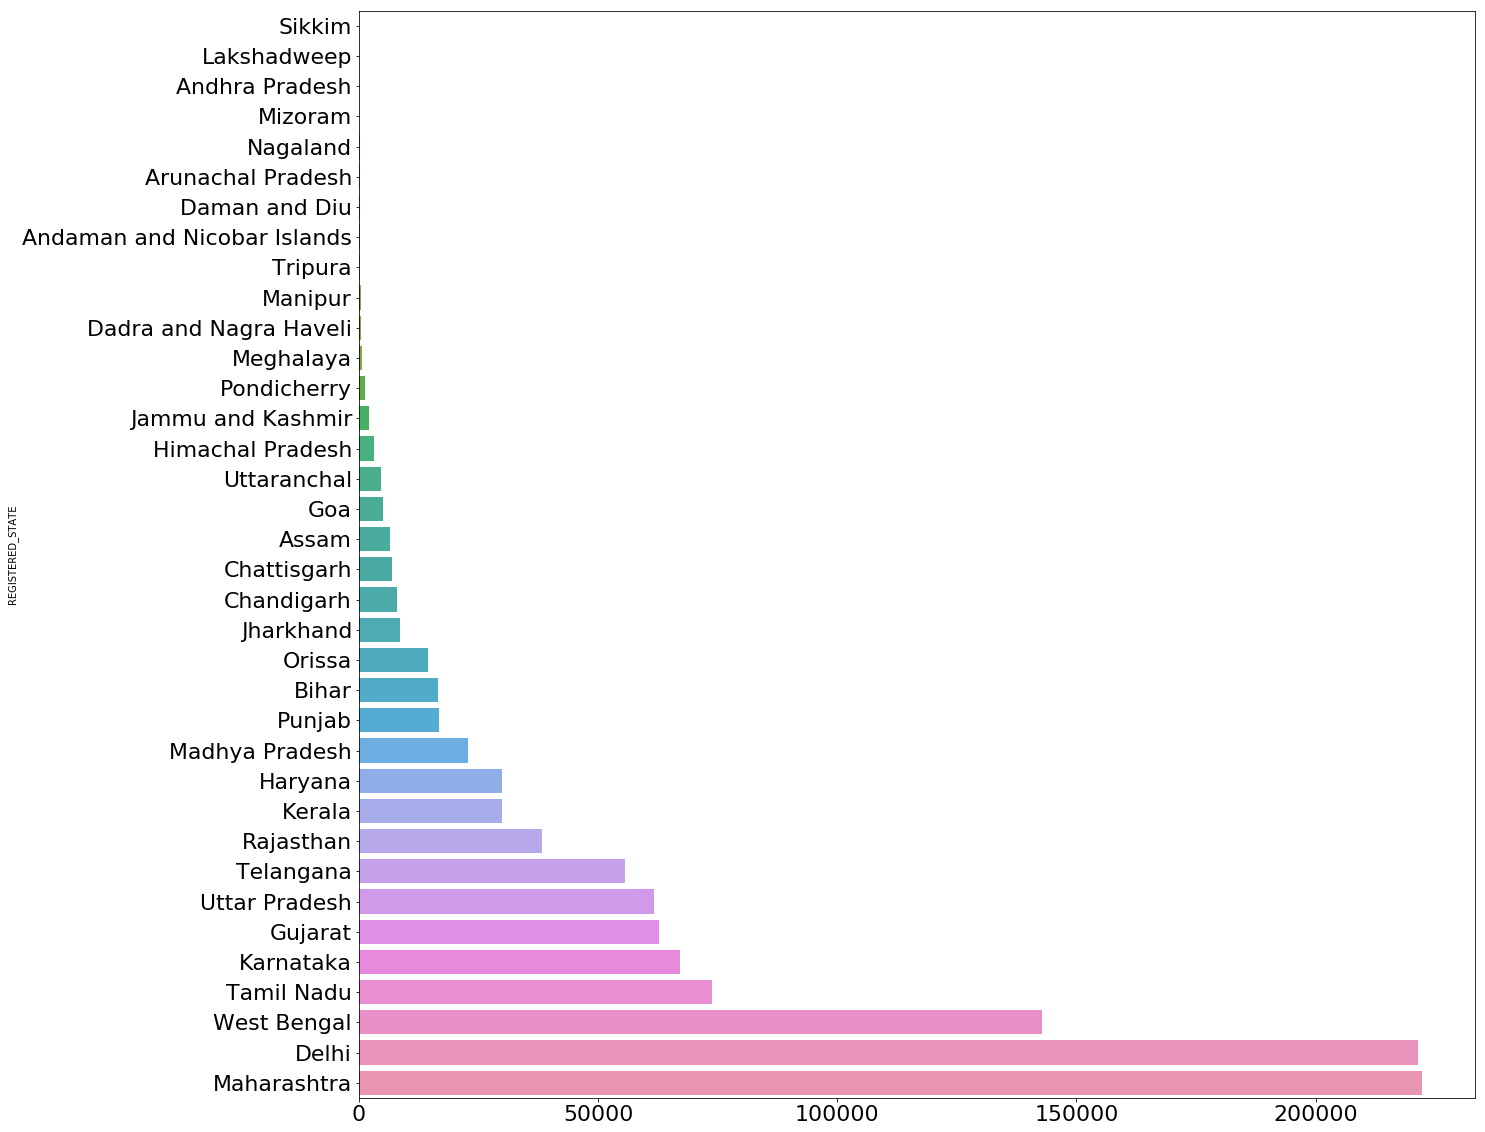

In [174]:
matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22) 

state_count = data.groupby('REGISTERED_STATE').size().sort_values(ascending=True)
plt.figure(figsize=(20,20))
sns.barplot(state_count.tolist(), state_count.keys())
plt.show()

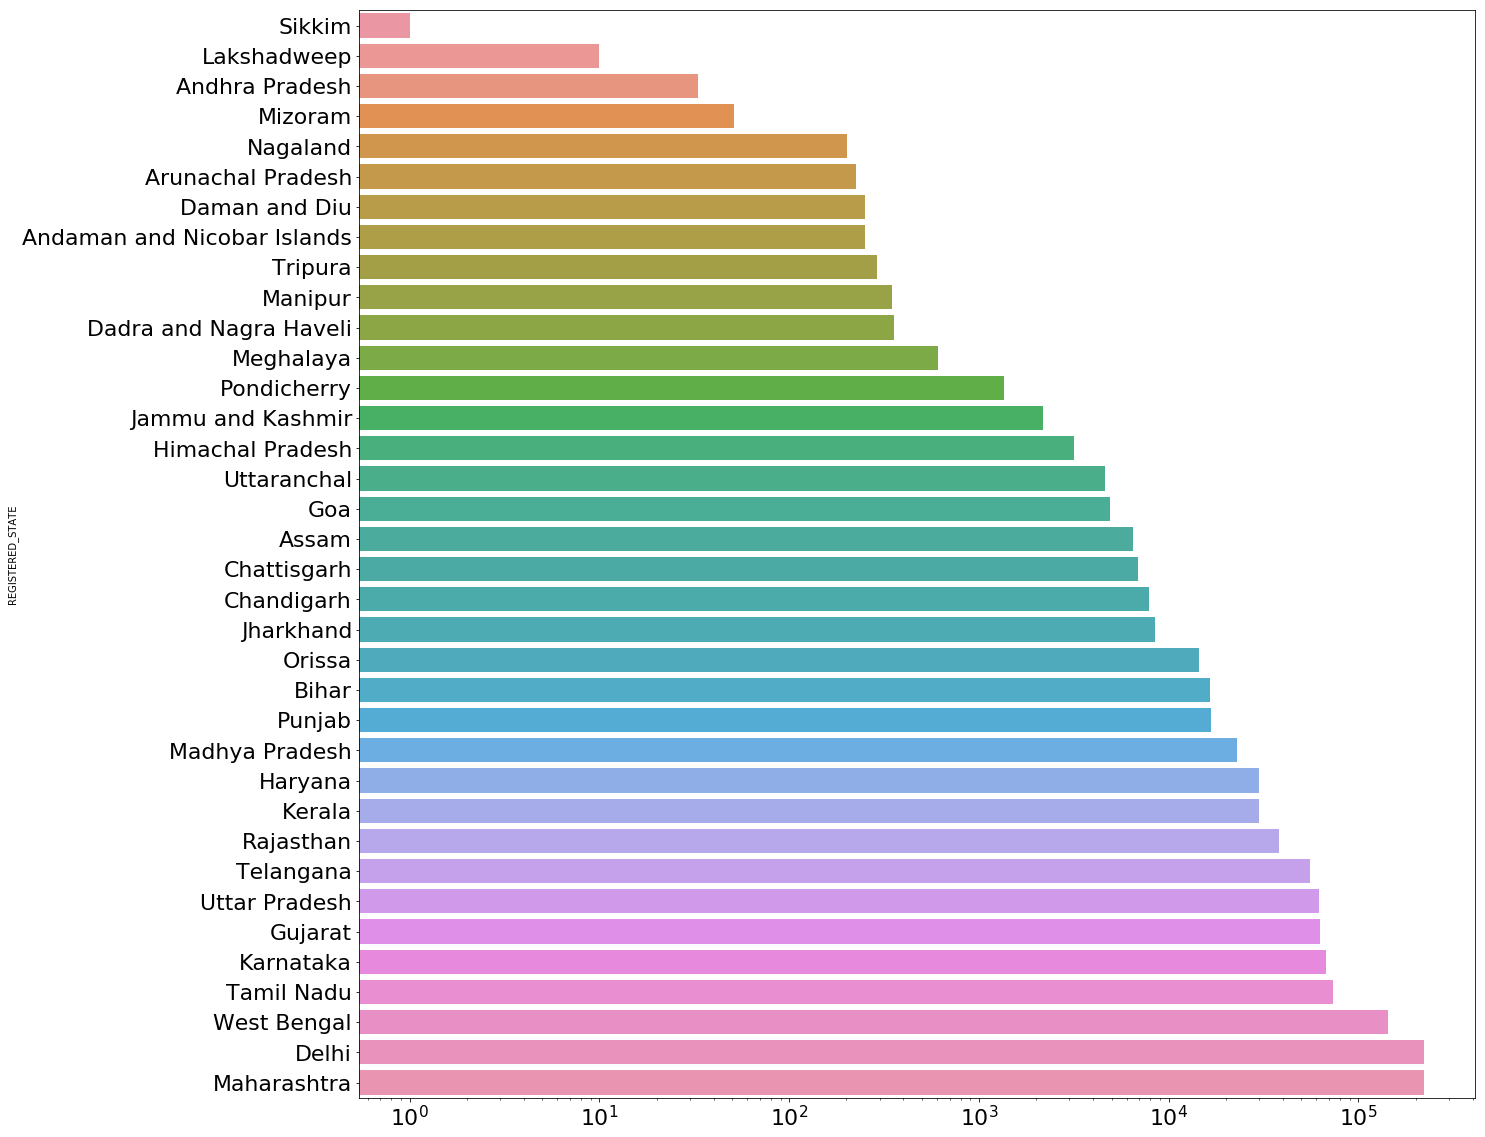

In [106]:
plt.figure(figsize=(20,20))
sns.barplot(state_count.tolist(), state_count.keys()).set(xscale="log")
plt.show()

### 2. Find number of registrations over the years

In [176]:
data['YEAR_OF_REGISTRATION'] = pd.to_datetime(data['DATE_OF_REGISTRATION'], errors = 'coerce').dt.year

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [177]:
year_count = data.groupby('YEAR_OF_REGISTRATION').size().to_frame().reset_index()

px.bar(year_count, x = 'YEAR_OF_REGISTRATION', y = 0, 
       labels={'YEAR_OF_REGISTRATION' : 'Year',
               '0': 'Number of registred companies' })